In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("C:/Users/CAPACITI-JHB/Desktop/Employee performance/employee_performance.csv")
df.head(10)

,Employee_ID,Date,Department,Job_Role,Hours_Worked,Tasks_Completed,Performance_Score,Tasks_Per_Hour
0,E00001,2023-01-01,Marketing,Manager,5.1,19,3.90,3.73
1,E00002,2023-01-02,HR,Consultant,9.3,8,2.95,0.86
2,E00003,2023-01-03,Finance,Developer,5.8,6,2.32,1.03
3,E00004,2023-01-04,Finance,Technician,6.4,15,1.51,2.34
4,E00005,2023-01-05,Marketing,Analyst,4.5,3,3.62,0.67
5,E00006,2023-01-06,Marketing,Analyst,11.6,2,1.40,0.17
6,E00007,2023-01-07,Sales,Manager,11.0,10,3.48,0.91
7,E00008,2023-01-08,HR,Manager,11.3,1,4.60,0.09
8,E00009,2023-01-09,Engineering,Technician,9.0,11,2.27,1.22
9,E00010,2023-01-10,HR,Developer,7.4,9,2.80,1.22


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Worked,1000.0,8.017700,2.343081,4.00,6.00,8.00,10.1000,12.00
Tasks_Completed,1010.0,10.486139,5.820430,1.00,5.00,10.00,16.0000,20.00
Performance_Score,1010.0,2.931485,1.131675,1.00,1.94,2.93,3.8875,4.99
Tasks_Per_Hour,1010.0,1.435307,0.960172,0.08,0.68,1.27,2.0000,5.00


In [5]:
print(df.dtypes)

Employee_ID           object
Date                  object
Department            object
Job_Role              object
Hours_Worked         float64
Tasks_Completed        int64
Performance_Score    float64
Tasks_Per_Hour       float64
dtype: object


In [7]:
missing_values = df.isnull().sum() 
print(missing_values)

Employee_ID           0
Date                  0
Department            0
Job_Role              0
Hours_Worked         10
Tasks_Completed       0
Performance_Score     0
Tasks_Per_Hour        0
dtype: int64


In [9]:
# Count rows with duplicate values
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print(f"Number of rows with duplicated values: {num_duplicates}")

Number of rows with duplicated values: 10


In [11]:
# Count rows with any null values
rows_with_nulls = df.isnull().any(axis=1).sum()
print(f"Number of rows with null values: {rows_with_nulls}")

Number of rows with null values: 10


In [13]:
# Count rows with duplicate values
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print(f"Number of rows with duplicated values: {num_duplicates}")

Number of rows with duplicated values: 10


In [53]:
# 1. Handle missing values in the 'Hours_Worked' column using mean imputation
if 'Hours_Worked' in df.columns:
    hours_mean = df['Hours_Worked'].mean()
    df['Hours_Worked'] = df['Hours_Worked'].fillna(hours_mean)

#df['Hours_Worked'].fillna(mean_hours_worked, inplace=True)
df.fillna({'Hours_Worked': hours_mean}, inplace=True)
# Save the DataFrame to a new CSV file
output_path = "C:/Users/CAPACITI-JHB/Desktop/Employee performance/updated_employee_performance.csv"
df.to_csv(output_path, index=False)


In [17]:
missing_values_count = df['Hours_Worked'].isnull().sum()
print(f"Missing values in 'Hours_Worked': {missing_values_count}")

Missing values in 'Hours_Worked': 10


In [19]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ensure correct data types for other columns
df['Employee_ID'] = df['Employee_ID'].astype(str)  # Ensure Employee_ID is a string
df['Department'] = df['Department'].astype('category')  # Convert Department to category
df['Job_Role'] = df['Job_Role'].astype('category')  # Convert Job_Role to category
df['Tasks_Completed'] = df['Tasks_Completed'].astype(int)  # Ensure Tasks_Completed is integer
df['Performance_Score'] = df['Performance_Score'].astype(float)  # Ensure Performance_Score is float
df['Tasks_Per_Hour'] = df['Tasks_Per_Hour'].astype(float)  # Ensure Tasks_Per_Hour is float

output_path = "C:/Users/CAPACITI-JHB/Desktop/Employee performance/updated_employee_performance.csv"
df.to_csv(output_path, index=False)

# Verify the data types
print(df.dtypes)

Employee_ID                  object
Date                 datetime64[ns]
Department                 category
Job_Role                   category
Hours_Worked                float64
Tasks_Completed               int32
Performance_Score           float64
Tasks_Per_Hour              float64
dtype: object


In [29]:
# 4. Flag abnormally high or low 'Tasks_Per_Hour' values using the 1.5 IQR rule
if 'Tasks_Per_Hour' in df.columns:
    Q1 = df['Tasks_Per_Hour'].quantile(0.25)
    Q3 = df['Tasks_Per_Hour'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


# Add a 'Flagged' column to identify outliers
    df['Flagged'] = ((df['Tasks_Per_Hour'] < lower_bound) | (df['Tasks_Per_Hour'] > upper_bound))

# Display the first few rows of the processed dataset
print (df.head())

  Employee_ID       Date Department    Job_Role  Hours_Worked  \
0      E00001 2023-01-01  Marketing     Manager           5.1   
1      E00002 2023-01-02         HR  Consultant           9.3   
2      E00003 2023-01-03    Finance   Developer           5.8   
3      E00004 2023-01-04    Finance  Technician           6.4   
4      E00005 2023-01-05  Marketing     Analyst           4.5   

   Tasks_Completed  Performance_Score  Tasks_Per_Hour  Flagged  
0               19               3.90            3.73    False  
1                8               2.95            0.86    False  
2                6               2.32            1.03    False  
3               15               1.51            2.34    False  
4                3               3.62            0.67    False  


In [31]:
# Ensure the 'Date' column is a datetime object
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year and Month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Display the updated DataFrame (optional)
print(df[['Date', 'Year', 'Month']].head(10))

        Date  Year  Month
0 2023-01-01  2023      1
1 2023-01-02  2023      1
2 2023-01-03  2023      1
3 2023-01-04  2023      1
4 2023-01-05  2023      1
5 2023-01-06  2023      1
6 2023-01-07  2023      1
7 2023-01-08  2023      1
8 2023-01-09  2023      1
9 2023-01-10  2023      1


In [35]:
# Calculate the average performance score for each department with explicit 'observed' parameter
average_performance_by_department = df.groupby('Department', observed=False)['Performance_Score'].mean()

# Display the result
print(average_performance_by_department)

Department
Engineering    2.944106
Finance        2.929848
HR             3.011878
Marketing      2.847820
Sales          2.935305
Name: Performance_Score, dtype: float64


In [37]:
# Group by Job Role and calculate the average tasks completed per day with observed=False
average_tasks_by_role = df.groupby('Job_Role', observed=False)['Tasks_Completed'].mean()

# Sort by the average number of tasks completed per day in descending order
top_3_roles = average_tasks_by_role.sort_values(ascending=False).head(3)

# Display the top 3 roles with the highest average tasks completed per day
print(top_3_roles)

Job_Role
Analyst       11.272277
Manager       10.395000
Technician    10.354497
Name: Tasks_Completed, dtype: float64


In [39]:
# Group by Department and calculate the total tasks completed with observed=False
total_tasks_by_department = df.groupby('Department', observed=False)['Tasks_Completed'].sum()

# Display the result
print(total_tasks_by_department)

Department
Engineering    2348
Finance        2017
HR             1851
Marketing      2188
Sales          2187
Name: Tasks_Completed, dtype: int32


C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_8704\1449535904.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_performance_by_department = df.groupby('Department')['Performance_Score'].mean()
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_8704\1449535904.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_performance_by_department.index, y=average_performance_by_department.values, palette='coolwarm')


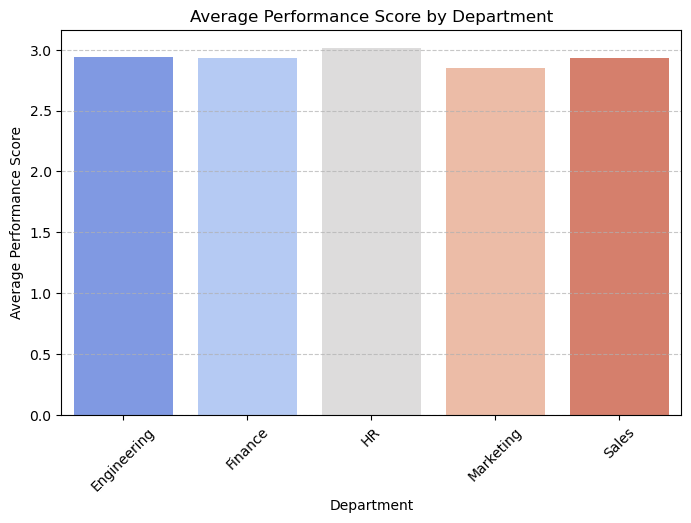

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


# Ensure the 'Date' column is a datetime object
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Calculate the average performance score for each department
average_performance_by_department = df.groupby('Department')['Performance_Score'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=average_performance_by_department.index, y=average_performance_by_department.values, palette='coolwarm')

# Labels and title
plt.xlabel("Department")
plt.ylabel("Average Performance Score")
plt.title("Average Performance Score by Department")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_8704\1022322259.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_tasks_by_department = df.groupby('Department')['Tasks_Completed'].sum()


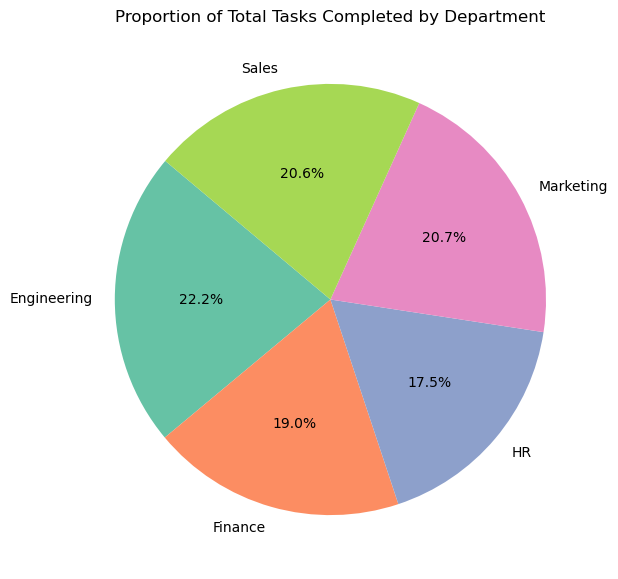

In [59]:

# Calculate total tasks completed by department
total_tasks_by_department = df.groupby('Department')['Tasks_Completed'].sum()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(total_tasks_by_department, labels=total_tasks_by_department.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=140)

# Title
plt.title("Proportion of Total Tasks Completed by Department")

# Show the plot
plt.show()

In [ ]:
 **Insights and Recommendation:**

1. Best Performing Department:
   The HR department shows the highest average performance score (3.00). To replicate success:

   *  Implement cross-departmental knowledge sharing sessions led by HR

   * Adopt HR's task prioritization methods across all departments

3. Improvement Strategies for Lower Performers:
   For departments like Marketing (2.85) and Finance (2.94):

   * Introduce targeted skills development programs focusing on time management

   * Implement process automation for repetitive tasks to boost efficiency

   * Establish mentorship programs pairing low performers with top performers

   * Review and optimize workflow processes in underperforming departments

**Key Findings:**

* Engineering completes the most tasks (2337), but has mid-range performance scores

* Analyst roles complete the most daily tasks (11.36 average)

* Tasks/hour show seasonal patterns with dips in mid-year months

* Flagged outliers should be reviewed for potential data errors or special  circumstances

**Recommendations:**

1. Develop department-specific performance improvement plans

2. Implement real-time performance dashboards for managers

3. Create cross-functional teams to share best practices

4. Review and standardize performance metrics across departments